<a href="https://colab.research.google.com/github/RandleRaccoon/PHYS_3025/blob/main/Homework_1_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python standard library
import time
import warnings

# Third-party software
import numpy as np

# Astropy
from astropy import coordinates as coord
from astropy import units as u
from astropy.table import Table

# Astroquery. This tutorial requires 0.3.5 or greater.
!pip install astroquery #note we need to install it manually using !pip install
import astroquery
from astroquery.simbad import Simbad
from astroquery.vo_conesearch import conf, conesearch, vos_catalog

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 17.5 MB/s eta 0:00:00


In [2]:
from astropy.table import Table
from astroquery.vizier import Vizier

In [39]:
#Limiting the coloumns for all the different items we need for the HR Diagram

v = Vizier(columns=['Vmag', 'B-V', 'Plx', 'e_Plx', 'SpType'] ,
           column_filters={"Vmag": '! =',"B-V": '! =',"Plx": '! =',"e_Plx": '! =',"SpType": '! =',}, row_limit = -1)


In [41]:
#Constructing Arrays

result = v.query_constraints(catalog='V/137D')
table = result[0]



In [44]:
#Adjusting for parallax errors

data_adj = table[table['e_Plx']/table['Plx']<0.05]
print(data_adj)


 Vmag  B-V    Plx   e_Plx   SpType 
 mag   mag    mas    mas           
----- ------ ------ ----- ---------
 8.80  1.128  -0.10  1.27    K0 III
 6.43  0.514  13.40  0.57       F8V
 8.65  0.778  23.64  0.66       G6V
10.61  0.570  -2.26  3.22        OB
 6.18  1.032   7.34  0.35     K2III
 6.49  0.616  16.83  0.51    G0/2IV
 7.40  0.551  15.40  0.69    G2IV/V
 8.27  0.863  33.48  0.66       K1V
 7.05  0.520  25.77  0.49        G0
 9.09  0.091  -1.96  1.26        B5
  ...    ...    ...   ...       ...
 6.78  0.215  11.19  0.46       A7V
 7.07  0.178  11.21  0.54        A2
 8.69  1.042  43.49  1.00   K4V (k)
 4.03  0.419  31.26  0.15       F4V
 7.47  0.741  39.85  0.78     G8+ V
 5.81  0.539  34.57  0.51        F8
 8.85  1.187  39.43  1.36       K4V
 4.49 -0.075   8.74  0.18       B8V
 7.70  1.420 159.48  6.61     K7.0V
 9.72  0.792  -2.16  1.27 O4/6III/V
Length = 15127 rows


In [56]:
#Mv on y-axis

distance = 1/(data_adj["Plx"]*1E-3)

Mv = data_adj['Vmag'] - 5*np.log10(distance) + 5
print(Mv)

   Vmag   
----------
        --
 2.0655246
  5.518237
        --
0.50848055
 2.6204205
  3.337604
  5.893928
 4.1055727
        --
       ...
  4.487658
 2.0241513
  2.318028
  6.881947
 1.5049453
 5.4721417
 3.5034966
  6.829135
-0.8024435
 8.7135315
        --
Length = 15127 rows


<ipython-input-56-af6e466d833a>:5: RuntimeWarning: invalid value encountered in log10
  Mv = data_adj['Vmag'] - 5*np.log10(distance) + 5


Text(0, 0.5, 'Absolute Magnitude')

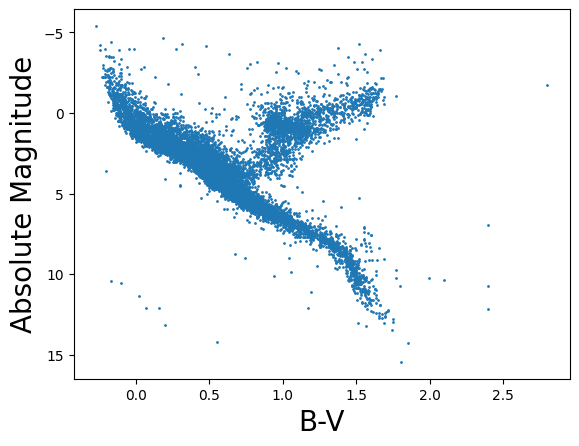

In [62]:
#HR Diagram (hopefull)

plt.scatter(data_adj["B-V"],Mv, s=1,)
plt.ylim(reversed(plt.ylim()))
plt.xlabel("B-V", fontsize=20)
plt.ylabel("Absolute Magnitude", fontsize=20)

To do a Temperature vs. Luminosity diagram you would need to convert your found values for what you want to get. The only special considerations I can think of is the relationship between temperature and color. To get luminosity you can use the absolute magnitude since the values are directly related to one another. Specifically, you would need the bolometric magnitude.